In [1]:
pip install pandas numpy


Note: you may need to restart the kernel to use updated packages.


In [112]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data from the CSV file
data_path = "emailmarketingrawdataset.xlsx"
df = pd.read_excel(data_path)

# Get an overview of the data
print("Data Overview:")
print(df.head())  # Display the first few rows of the DataFrame
print()

# Check the dimensions of the data
print("Data Shape:")
print(df.shape)  # Display the number of rows and columns in the DataFrame
print()

# Get information about the data types of each column and missing values
print("Data Info:")
print(df.info())
print()

# Summary statistics of the numerical columns
print("Summary Statistics:")
print(df.describe())
print()

# Check for missing values in the data
print("Missing Values:")
print(df.isnull().sum())
print()

# Check for duplicates
print("Duplicate Entries:")
print(df.duplicated().sum())


Data Overview:
                          Campaign Name Channel Status  \
0        Up to 18 to secure your future   Email   Sent   
1        Created an account no app 2021   Email   Sent   
2               Retention July campaign   Email   Sent   
3                     Old loan customer   Email   Sent   
4  Created and no application July 2023   Email   Sent   

                               Subject line or Title             Entered  \
0               Up to 18% p.a to secure your future! 2023-07-13 16:50:28   
1           Fast approval, zero delay, instant N500k 2023-07-13 14:15:40   
2  Get ‚Ç¶6m today, repay in up to 24 months, [FI... 2023-07-12 12:55:08   
3         An exclusive offer for returning customers 2023-07-11 12:10:26   
4  Let's give you up to N500k for your needs, [FI... 2023-07-11 10:50:23   

            Sent Date  Published   Sent  Delivered  Delivered %  \
0 2023-07-13 16:51:53      42577  42577      41725        98.00   
1 2023-07-13 14:40:00      69384  69384      

In [113]:
df.fillna(0, inplace=True)
print()

Get the Summary statistics of the data 

In [114]:
df.describe()

,Published,Sent,Delivered,Delivered %,Total Opened/Read,Unique Opened,Unique Opened %,Total Clicked,Unique Clicked,Unique Clicked %,Conversions,Conversion %,Revenue
count,2.964000e+03,2.964000e+03,2.964000e+03,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.0,2964.0,2964.0
mean,2.868430e+05,2.868385e+05,2.836614e+05,98.729531,5.698666e+04,45452.916329,25.086137,496.602564,360.679825,1.425159,0.0,0.0,0.0
std,6.602652e+05,6.602655e+05,6.492855e+05,4.405440,1.261801e+05,100689.875610,15.668937,2397.800151,1435.429031,5.457115,0.0,0.0,0.0
min,1.000000e+00,1.000000e+00,1.000000e+00,4.100000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,1.219250e+03,1.219250e+03,1.200000e+03,99.257500,4.410000e+02,314.750000,15.645000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,2.213300e+04,2.213300e+04,2.198650e+04,99.640000,6.320000e+03,4847.000000,20.570000,13.000000,9.000000,0.060000,0.0,0.0,0.0
75%,1.822645e+05,1.822645e+05,1.814255e+05,99.820000,3.915825e+04,30588.000000,29.102500,247.000000,182.000000,0.400000,0.0,0.0,0.0
max,4.290615e+06,4.290615e+06,4.020503e+06,100.000000,1.134131e+06,862671.000000,100.000000,71328.000000,34627.000000,100.000000,0.0,0.0,0.0


Data cleaning: Find missing and Duplicate Value 

In [115]:
# Check for missing values in the data
print("Missing Values:")
print(df.isnull().sum())
print()

# Check for duplicates
print("Duplicate Entries:")
print(df.duplicated().sum())

Missing Values:
Campaign Name            0
Channel                  0
Status                   0
Subject line or Title    0
Entered                  0
Sent Date                0
Published                0
Sent                     0
Delivered                0
Delivered %              0
Total Opened/Read        0
Unique Opened            0
Unique Opened %          0
Total Clicked            0
Unique Clicked           0
Unique Clicked %         0
Conversions              0
Conversion %             0
Revenue                  0
Msg Size                 0
dtype: int64

Duplicate Entries:
2


In [116]:
# checking for duplicate values
duplicate_rows = df[df.duplicated()]

# Check the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

df.head()

Duplicate Rows:
                            Campaign Name Channel Status  \
1790  Alpher newsletter JUNE Customers II   Email   Sent   
2251             No debit card - PB NBA 4   Email   Sent   

              Subject line or Title             Entered           Sent Date  \
1790             The Œ±lpher Digest 2023-06-01 17:19:45 2023-06-01 19:00:00   
2251  1 million Naira up for grabs! 2022-10-18 19:44:01 2022-10-20 10:30:00   

      Published   Sent  Delivered  Delivered %  Total Opened/Read  \
1790      55421  55421      46726        84.31             7281.0   
2251          2      2          2       100.00                0.0   

      Unique Opened  Unique Opened %  Total Clicked  Unique Clicked  \
1790         5690.0            10.27              0               0   
2251            0.0             0.00              0               0   

      Unique Clicked %  Conversions  Conversion %  Revenue Msg Size  
1790               0.0          0.0           0.0      0.0        4  
225

,Campaign Name,Channel,Status,Subject line or Title,Entered,Sent Date,Published,Sent,Delivered,Delivered %,Total Opened/Read,Unique Opened,Unique Opened %,Total Clicked,Unique Clicked,Unique Clicked %,Conversions,Conversion %,Revenue,Msg Size
0,Up to 18 to secure your future,Email,Sent,Up to 18% p.a to secure your future!,2023-07-13 16:50:28,2023-07-13 16:51:53,42577,42577,41725,98.00,9894.0,8300.0,19.49,246,184,0.43,0.0,0.0,0.0,29
1,Created an account no app 2021,Email,Sent,"Fast approval, zero delay, instant N500k",2023-07-13 14:15:40,2023-07-13 14:40:00,69384,69384,68388,98.56,11865.0,8691.0,12.53,1863,1273,1.83,0.0,0.0,0.0,15
2,Retention July campaign,Email,Sent,"Get ‚Ç¶6m today, repay in up to 24 months, [FI...",2023-07-12 12:55:08,2023-07-12 13:15:00,3068,3068,3056,99.61,1282.0,948.0,30.90,118,90,2.93,0.0,0.0,0.0,14
3,Old loan customer,Email,Sent,An exclusive offer for returning customers,2023-07-11 12:10:26,2023-07-11 12:30:00,44809,44809,38295,85.46,12894.0,9252.0,20.65,1563,962,2.15,0.0,0.0,0.0,14
4,Created and no application July 2023,Email,Sent,"Let's give you up to N500k for your needs, [FI...",2023-07-11 10:50:23,2023-07-11 12:15:00,21505,21505,21186,98.52,4341.0,2989.0,13.90,929,605,2.81,0.0,0.0,0.0,14


In [117]:
# List of column names to drop
columns_to_drop = ['Campaign Name', 'Channel', 'Status', 
                   'Subject line or Title' ,'Entered' ,'Published',
                   'Delivered', 'Total Opened/Read', 'Total Clicked',
                   'Unique Clicked' ,'Unique Clicked %','Conversions', 'Conversion %', 'Revenue','Msg Size'
                  ]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)
df.head()

,Sent Date,Sent,Delivered %,Unique Opened,Unique Opened %
0,2023-07-13 16:51:53,42577,98.00,8300.0,19.49
1,2023-07-13 14:40:00,69384,98.56,8691.0,12.53
2,2023-07-12 13:15:00,3068,99.61,948.0,30.90
3,2023-07-11 12:30:00,44809,85.46,9252.0,20.65
4,2023-07-11 12:15:00,21505,98.52,2989.0,13.90


In [118]:
# Convert "Sent_Time" column to datetime format
df['Sent_Time'] = pd.to_datetime(df['Sent Date'])
# Extract date, month, and year components
df['Sent Date'] = df['Sent_Time'].dt.date
df['Sent Month'] = df['Sent_Time'].dt.month
df['Sent Year'] = df['Sent_Time'].dt.year

# Create a new column with month names
df['send_date_month'] = df['Sent_Time'].dt.strftime('%B')

# Create a new column with day of the week names
df['send_day_of_week'] = df['Sent_Time'].dt.strftime('%A')
# Extract time component
df['Sent Time'] = df['Sent_Time'].dt.time
# Extract the hour from the 'Sent Date' column
df['Hour'] = df['Sent_Time'].dt.hour

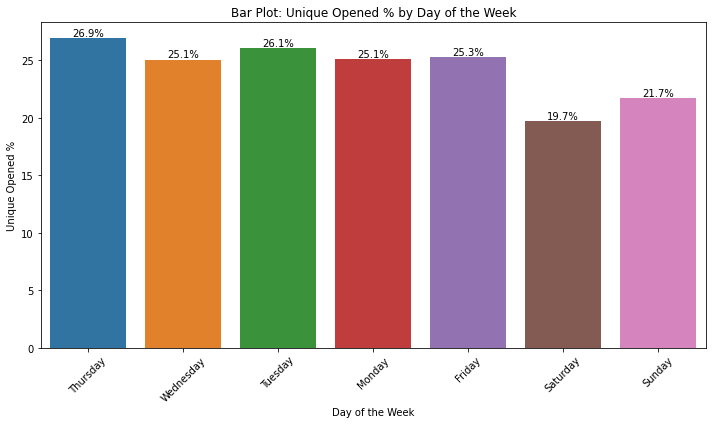

In [119]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='send_day_of_week', y='Unique Opened %', data=df, ci=None)

# Annotate the bars with distribution percentage
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Bar Plot: Unique Opened % by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Unique Opened %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [120]:
average_opened_percentages = df.groupby('send_day_of_week')['Unique Opened %'].mean().reset_index()

# Find the day with the highest average 'Unique Opened %'
best_day = average_opened_percentages.loc[average_opened_percentages['Unique Opened %'].idxmax()]

print("Best Day to Send Emails:", best_day['send_day_of_week'])
print("Average Unique Opened Percentage on Best Day:", best_day['Unique Opened %'])


Best Day to Send Emails: Thursday
Average Unique Opened Percentage on Best Day: 26.948212290502795


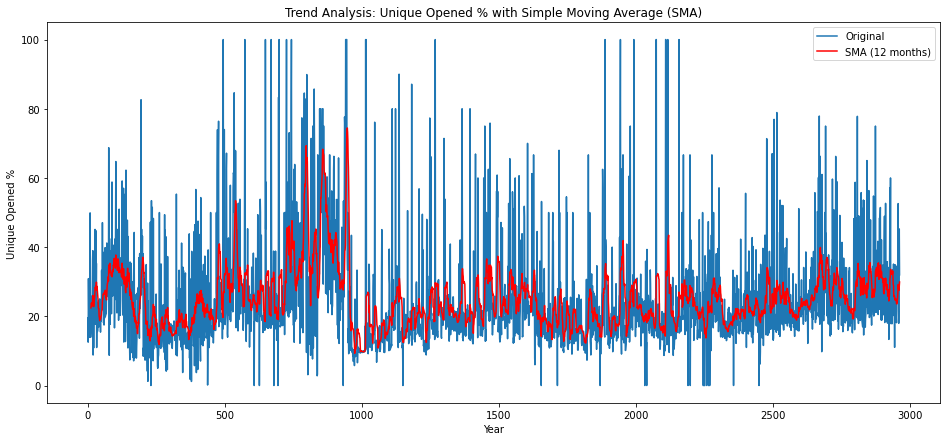

In [121]:
# Calculate the Simple Moving Average with a window size of 12 months
sma = df['Unique Opened %'].rolling(window=12).mean()

# Visualize the original time series and the SMA
plt.figure(figsize=(16, 7))
plt.plot(df.index, df['Unique Opened %'], label='Original')
plt.plot(df.index, sma, color='red', label='SMA (12 months)')
plt.xlabel('Year')
plt.ylabel('Unique Opened %')
plt.title('Trend Analysis: Unique Opened % with Simple Moving Average (SMA)')
plt.legend()
plt.show()

In [122]:
df["Sent Date"] = pd.to_datetime(df['Sent Date'], infer_datetime_format=True)
df = df.set_index(["Sent Date"])

Check if the data is statistically stationary 

In [123]:
from statsmodels.tsa.stattools import adfuller
# Perform the Augmented Dickey-Fuller test
result = adfuller(df['Unique Opened %'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, ':', value)

ADF Statistic: -5.810268596720019
p-value: 4.4181555992820846e-07
Critical Values:
1% : -3.4325799926649294
5% : -2.8625252631133096
10% : -2.567294482817665


In [124]:
from pmdarima import auto_arima
#ignore harmless warning 
import warnings
warnings.filterwarnings("ignore")

In [125]:
stepwise_fit = auto_arima(df['Unique Opened %'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25517.814, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24929.672, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24277.680, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25515.814, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24178.233, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24169.163, Time=1.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=24702.650, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=24168.777, Time=1.46 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=24553.096, Time=0.27 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=24165.573, Time=1.85 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=24475.236, Time=0.32 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=24166.413, Time=2.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=24164.073, Time=4.08 sec
 ARIMA(3,1,2)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2964
Model:               SARIMAX(4, 1, 2)   Log Likelihood              -12074.033
Date:                Fri, 08 Sep 2023   AIC                          24162.066
Time:                        07:35:59   BIC                          24204.024
Sample:                             0   HQIC                         24177.168
                               - 2964                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8596      0.165      5.220      0.000       0.537       1.182
ar.L2         -0.0778      0.040     -1.937      0.053      -0.156       0.001
ar.L3         -0.0163      0.023     -0.708      0.479      -0.061       0.029
ar.L4          0.0234      0.022      1.048      0.295      -0.020       0.067
ma.L1         -1.6167      0.164     -9.850      0.000      -1.938      -1.295
ma.L2          0.6254      0.159      3.925      0.000       0.313       0.938
sigma2       202.4437      2.672     75.766      0.000     197.207     207.681
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6454.85
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             1.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
from statsmodels.tsa.arima.model import ARIMA

In [127]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape)
print(test.shape)

(2964, 11)
(2934, 11)
(30, 11)


In [128]:
model= ARIMA(train['Unique Opened %'], order=(4, 1, 2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Unique Opened %   No. Observations:                 2934
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -11960.802
Date:                Fri, 08 Sep 2023   AIC                          23935.603
Time:                        07:36:08   BIC                          23977.490
Sample:                             0   HQIC                         23950.687
                               - 2934                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8713      0.162      5.393      0.000       0.555       1.188
ar.L2         -0.0793      0.040     -1.994      0.046      -0.157      -0.001
ar.L3         -0.0183      0.023     -0.785      0.432      -0.064       0.027
ar.L4          0.0227      0.022      1.016      0.310      -0.021       0.067
ma.L1         -1.6278      0.161    -10.112      0.000      -1.943      -1.312
ma.L2          0.6360      0.156      4.067      0.000       0.330       0.943
sigma2       203.4390      2.699     75.371      0.000     198.149     208.729
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6331.91
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             1.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Sent Date'>

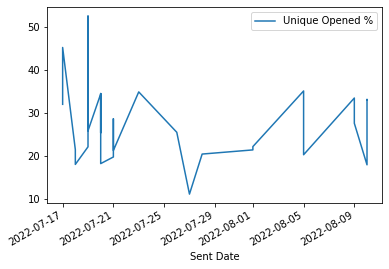

In [129]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

test['Unique Opened %'].plot(legend=True)

In [130]:
test['Unique Opened %'].mean()

27.300000000000004

In [131]:
from sklearn.metrics import mean_squared_error  
from math import sqrt
rsme = sqrt(mean_squared_error(pred, test['Unique Opened %'])) 
print(rsme)

8.857256210809515


In [132]:
# Calculate MSE
mse = mean_squared_error(pred, test['Unique Opened %'])
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(pred, test['Unique Opened %'])
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 78.45098758392373
Root Mean Squared Error (RMSE): 8.857256210809515
Mean Absolute Error (MAE): 7.210174349803002


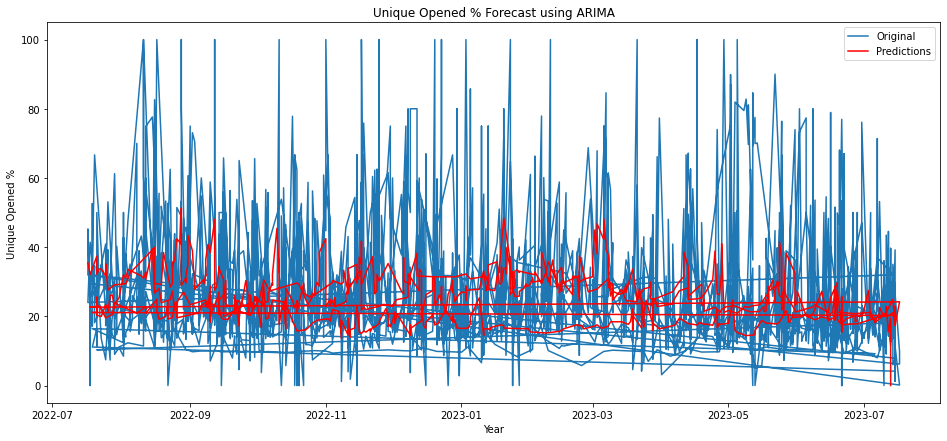

In [73]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df['Unique Opened %'], order=(4, 1, 2))
fitted_model = model.fit()


# Make predictions
predictions = fitted_model.predict(start=df.index[1], end=df.index[-1] + pd.DateOffset(months=0))


# Visualize the original time series and the predictions
plt.figure(figsize=(16, 7))
plt.plot(df['Unique Opened %'], label='Original')
plt.plot(predictions, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Unique Opened %')
plt.title('Unique Opened % Forecast using ARIMA')
plt.legend()
plt.show()

In [81]:
# Handle duplicates
df = df.loc[~df.index.duplicated(keep='first')]  # Keep first occurrence

# Handle missing dates
complete_date_range = pd.date_range(start=df.index.min(), end=df.index.max())
df_reindexed = df.reindex(complete_date_range, fill_value=0)

In [96]:
# Make predictions for the entire forecast period


# Specify the desired forecast start and end dates within your DataFrame's index
forecast_start_date = '2022-07-21'  # Adjust this to your desired start date
forecast_end_date = '2023-06-14'    # Adjust this to your desired end date

# Create Timestamp objects from the specified dates
forecast_start = pd.Timestamp(forecast_start_date)
forecast_end = pd.Timestamp(forecast_end_date)

# Now, you can proceed with your predictions
predictions = fitted_model.predict(start=forecast_start, end=forecast_end, typ='levels')

# Get the corresponding send day of the week for the best optimized day
best_send_day_index = np.argmax(predictions)
best_send_day_of_week = forecast_start + pd.DateOffset(days=int(best_send_day_index))

# Convert the day of the week index to the actual day name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
best_send_day_name = day_names[best_send_day_of_week.weekday()]

print("Best Optimized Send Day of the Week:", best_send_day_name)

# Calculate evaluation metrics for the entire forecast period
target_values = df_reindexed['Unique Opened %'].loc[forecast_start:forecast_end]

# Ensure that both target_values and predictions have the same length
# You can trim or extend predictions to match the length of target_values
predictions = predictions.loc[target_values.index]

# Calculate the mean squared error
mse_arima = mean_squared_error(target_values, predictions)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(target_values, predictions)

# Print or use the evaluation metrics as needed
print("Mean Squared Error (MSE):", mse_arima)
print("Root Mean Squared Error (RMSE):", rmse_arima)
print("Mean Absolute Error (MAE):", mae_arima)


# Visualize the original time series and the predictions
plt.figure(figsize=(16, 7))
plt.plot(df['Unique Opened %'], label='Original')
plt.plot(predictions, color='red', label='Predictions')
plt.axvline(x=forecast_start, color='gray', linestyle='--', label='Forecast Start')
plt.axvline(x=forecast_end, color='gray', linestyle='--', label='Forecast End')
plt.xlabel('Year')
plt.ylabel('Unique Opened %')
plt.title('Unique Opened % Forecast using ARIMA')
plt.legend()
plt.show()


Best Optimized Send Day of the Week: Wednesday


KeyError: "[Timestamp('2022-07-24 00:00:00'), Timestamp('2022-07-27 00:00:00'), Timestamp('2022-07-30 00:00:00'), Timestamp('2022-07-31 00:00:00'), Timestamp('2022-08-04 00:00:00'), Timestamp('2022-08-06 00:00:00'), Timestamp('2022-08-07 00:00:00'), Timestamp('2022-08-09 00:00:00'), Timestamp('2022-08-10 00:00:00'), Timestamp('2022-08-11 00:00:00'), Timestamp('2022-08-13 00:00:00'), Timestamp('2022-08-14 00:00:00'), Timestamp('2022-08-15 00:00:00'), Timestamp('2022-08-27 00:00:00'), Timestamp('2022-08-29 00:00:00'), Timestamp('2022-09-01 00:00:00'), Timestamp('2022-09-04 00:00:00'), Timestamp('2022-09-11 00:00:00'), Timestamp('2022-09-15 00:00:00'), Timestamp('2022-09-18 00:00:00'), Timestamp('2022-09-20 00:00:00'), Timestamp('2022-09-22 00:00:00'), Timestamp('2022-09-25 00:00:00'), Timestamp('2022-09-26 00:00:00'), Timestamp('2022-09-27 00:00:00'), Timestamp('2022-09-30 00:00:00'), Timestamp('2022-10-02 00:00:00'), Timestamp('2022-10-07 00:00:00'), Timestamp('2022-10-09 00:00:00'), Timestamp('2022-10-15 00:00:00'), Timestamp('2022-10-16 00:00:00'), Timestamp('2022-10-20 00:00:00'), Timestamp('2022-10-21 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2022-11-06 00:00:00'), Timestamp('2022-11-13 00:00:00'), Timestamp('2022-11-20 00:00:00'), Timestamp('2022-11-26 00:00:00'), Timestamp('2022-12-04 00:00:00'), Timestamp('2022-12-05 00:00:00'), Timestamp('2022-12-06 00:00:00'), Timestamp('2022-12-10 00:00:00'), Timestamp('2022-12-11 00:00:00'), Timestamp('2022-12-12 00:00:00'), Timestamp('2022-12-17 00:00:00'), Timestamp('2022-12-18 00:00:00'), Timestamp('2022-12-31 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-06 00:00:00'), Timestamp('2023-01-07 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-01-21 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-26 00:00:00'), Timestamp('2023-01-28 00:00:00'), Timestamp('2023-02-03 00:00:00'), Timestamp('2023-02-04 00:00:00'), Timestamp('2023-02-05 00:00:00'), Timestamp('2023-02-12 00:00:00'), Timestamp('2023-02-17 00:00:00'), Timestamp('2023-02-18 00:00:00'), Timestamp('2023-02-19 00:00:00'), Timestamp('2023-02-20 00:00:00'), Timestamp('2023-02-21 00:00:00'), Timestamp('2023-02-26 00:00:00'), Timestamp('2023-02-27 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-04 00:00:00'), Timestamp('2023-03-11 00:00:00'), Timestamp('2023-03-12 00:00:00'), Timestamp('2023-03-20 00:00:00'), Timestamp('2023-03-26 00:00:00'), Timestamp('2023-03-30 00:00:00'), Timestamp('2023-04-01 00:00:00'), Timestamp('2023-04-02 00:00:00'), Timestamp('2023-04-03 00:00:00'), Timestamp('2023-04-04 00:00:00'), Timestamp('2023-04-05 00:00:00'), Timestamp('2023-04-08 00:00:00'), Timestamp('2023-04-10 00:00:00'), Timestamp('2023-04-12 00:00:00'), Timestamp('2023-04-14 00:00:00'), Timestamp('2023-04-15 00:00:00'), Timestamp('2023-04-16 00:00:00'), Timestamp('2023-04-22 00:00:00'), Timestamp('2023-04-23 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-06 00:00:00'), Timestamp('2023-05-07 00:00:00'), Timestamp('2023-05-11 00:00:00'), Timestamp('2023-05-14 00:00:00'), Timestamp('2023-05-20 00:00:00'), Timestamp('2023-05-21 00:00:00'), Timestamp('2023-06-02 00:00:00'), Timestamp('2023-06-04 00:00:00'), Timestamp('2023-06-07 00:00:00'), Timestamp('2023-06-10 00:00:00'), Timestamp('2023-06-11 00:00:00'), Timestamp('2023-06-13 00:00:00')] not in index"

In [108]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Create and fit the ARIMA model (replace 'order' with your desired order)
arima_model = ARIMA(train['Unique Opened %'], order=(4, 1, 2))
arima_result = arima_model.fit()

# Make predictions
start_date = test.index[0]  # Get the start date from the test data
end_date = test.index[-1]   # Get the end date from the test data
predictions = arima_result.predict(start=start_date, end=end_date, dynamic=False)

# Create a DataFrame with date index for predicted values
predicted_df = pd.DataFrame({'Predicted Values': predictions}, index=test.index)

# Print the actual and predicted values
print("Actual Values:")
print(test['Unique Opened %'])

print("\nPredicted Values:")
print(predicted_df)



ValueError: cannot reindex on an axis with duplicate labels

SARIMAX MODEL PREDICTION

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.35041D+00    |proj g|=  6.27574D-01


 This problem is unconstrained.



At iterate    5    f=  4.08903D+00    |proj g|=  1.83295D-02

At iterate   10    f=  4.07851D+00    |proj g|=  5.62043D-03

At iterate   15    f=  4.07816D+00    |proj g|=  6.08301D-03

At iterate   20    f=  4.07742D+00    |proj g|=  1.17811D-03

At iterate   25    f=  4.07742D+00    |proj g|=  7.01928D-04

At iterate   30    f=  4.07730D+00    |proj g|=  1.65097D-03

At iterate   35    f=  4.07702D+00    |proj g|=  5.60447D-03

At iterate   40    f=  4.07622D+00    |proj g|=  2.90534D-03

At iterate   45    f=  4.07614D+00    |proj g|=  5.51983D-04

At iterate   50    f=  4.07602D+00    |proj g|=  2.13394D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

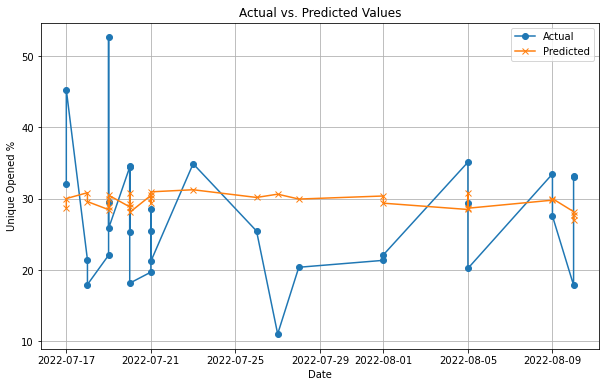


Mean Squared Error (MSE): 79.57946609686113
Root Mean Squared Error (RMSE): 8.920732374466859
Mean Absolute Error (MAE): 7.371839541292404


In [98]:

# Create and fit the SARIMAX model
arima_model = SARIMAX(train['Unique Opened %'], order=(4, 1, 2), seasonal_order=(4, 0, 3, 12))
arima_result = arima_model.fit()

# Get the predicted values with date index
predicted = arima_result.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Align the predicted values with the test data index
predicted.index = test.index

# Print the actual and predicted values
print("Actual Values:")
print(test['Unique Opened %'])

print("\nPredicted Values:")
print(predicted)

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Unique Opened %'], label='Actual', marker='o')
plt.plot(predicted.index, predicted, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Unique Opened %')
plt.legend()
plt.grid(True)
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(test['Unique Opened %'], predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Unique Opened %'], predicted)

print("\nMean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


LSTM MODEL PREDICTION

Epoch 1/100
148/148 [==============================] - 3s 7ms/step - loss: 0.0300
Epoch 2/100
148/148 [==============================] - 1s 6ms/step - loss: 0.0229
Epoch 3/100
148/148 [==============================] - 1s 4ms/step - loss: 0.0229
Epoch 4/100
148/148 [==============================] - 1s 4ms/step - loss: 0.0226
Epoch 5/100
148/148 [==============================] - 1s 4ms/step - loss: 0.0226
Epoch 6/100
148/148 [==============================] - 1s 4ms/step - loss: 0.0223
Epoch 7/100
148/148 [==============================] - 1s 6ms/step - loss: 0.0224
Epoch 8/100
148/148 [==============================] - 1s 6ms/step - loss: 0.0225
Epoch 9/100
148/148 [==============================] - 1s 7ms/step - loss: 0.0221
Epoch 10/100
148/148 [==============================] - 1s 5ms/step - loss: 0.0222
Epoch 11/100
148/148 [==============================] - 1s 5ms/step - loss: 0.0222
Epoch 12/100
148/148 [==============================] - 1s 6ms/step - loss: 0.0221
Epoch 13/100


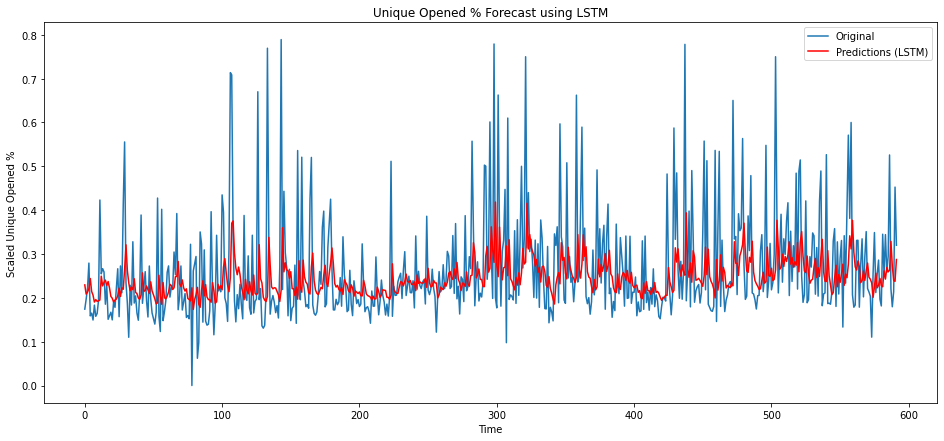

In [76]:

# Extract the feature you want to predict (e.g., Unique Opened %)
target_data = df['Unique Opened %'].values

# Normalize the data
scaler = MinMaxScaler()
target_data_scaled = scaler.fit_transform(target_data.reshape(-1, 1))

# Create sequences for LSTM
sequence_length = 7
X = []
y = []
for i in range(len(target_data_scaled) - sequence_length):
    X.append(target_data_scaled[i:i+sequence_length])
    y.append(target_data_scaled[i+sequence_length])
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Tune the hyperparameters
lstm_units = 50
batch_size = 16
epochs = 100  # You can adjust this number based on your dataset

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=lstm_units, activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model_lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Make predictions using LSTM
predictions_lstm_scaled = model_lstm.predict(X_test)

# Inverse transform predictions to the original scale
predictions_lstm = scaler.inverse_transform(predictions_lstm_scaled)

# Calculate evaluation metrics for the entire forecast period
mse_lstm = mean_squared_error(y_test, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, predictions_lstm)

print("Mean Squared Error (MSE) LSTM:", mse_lstm)
print("Root Mean Squared Error (RMSE) LSTM:", rmse_lstm)
print("Mean Absolute Error (MAE) LSTM:", mae_lstm)

# Visualize the original time series and the predictions
plt.figure(figsize=(16, 7))
plt.plot(target_data_scaled[train_size+sequence_length:], label='Original')
plt.plot(predictions_lstm_scaled, color='red', label='Predictions (LSTM)')
plt.xlabel('Time')
plt.ylabel('Scaled Unique Opened %')
plt.title('Unique Opened % Forecast using LSTM')
plt.legend()
plt.show()


Epoch 1/100
17/17 [==============================] - 5s 5ms/step - loss: 0.0766
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0214
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0200
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0190
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0187
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0183
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0178
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0177
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0174
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0174
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0173
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0175
Epoch 13/100
17/17 [=================

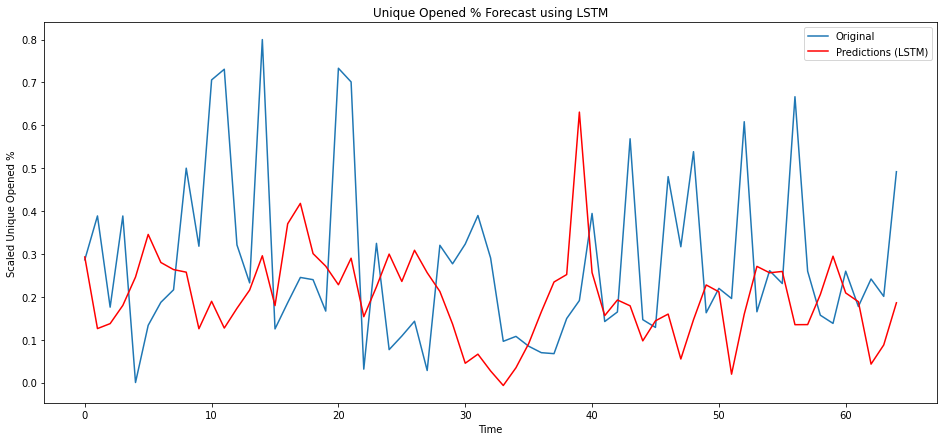

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Extract the feature you want to predict (e.g., Unique Opened %)
target_data = df['Unique Opened %'].values

# Normalize the data
scaler = MinMaxScaler()
target_data_scaled = scaler.fit_transform(target_data.reshape(-1, 1))

# Encode 'send_day_of_week' using one-hot encoding
encoder = OneHotEncoder()
day_of_week_encoded = encoder.fit_transform(df['send_day_of_week'].values.reshape(-1, 1)).toarray()

# Combine the 'Unique Opened %' and one-hot encoded 'send_day_of_week' data
combined_data = np.concatenate((target_data_scaled, day_of_week_encoded), axis=1)

# Create sequences for LSTM
sequence_length = 7
X = []
y = []
for i in range(len(combined_data) - sequence_length):
    X.append(combined_data[i:i+sequence_length])
    y.append(target_data_scaled[i+sequence_length])
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Tune the hyperparameters
lstm_units = 50
batch_size = 16
epochs = 100  # You can adjust this number based on your dataset

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=lstm_units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model_lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Make predictions using LSTM
predictions_lstm_scaled = model_lstm.predict(X_test)

# Inverse transform predictions to the original scale
predictions_lstm = scaler.inverse_transform(predictions_lstm_scaled)

# Calculate evaluation metrics for the entire forecast period
mse_lstm = mean_squared_error(y_test, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, predictions_lstm)

print("Mean Squared Error (MSE) LSTM:", mse_lstm)
print("Root Mean Squared Error (RMSE) LSTM:", rmse_lstm)
print("Mean Absolute Error (MAE) LSTM:", mae_lstm)

# Visualize the original time series and the predictions
plt.figure(figsize=(16, 7))
plt.plot(target_data_scaled[train_size+sequence_length:], label='Original')
plt.plot(predictions_lstm_scaled, color='red', label='Predictions (LSTM)')
plt.xlabel('Time')
plt.ylabel('Scaled Unique Opened %')
plt.title('Unique Opened % Forecast using LSTM')
plt.legend()
plt.show()
